In [1]:
api_key = 'drKP7Eky8mCEfQ_VRTTt'

In [4]:
#  quandl.get(["EOD/AAPL"]) 

In [5]:
import datetime
import pandas as pd
import quandl
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline

class stock_analyzer:
 
    now = datetime.datetime(2018, 3, 27)
    back = now - datetime.timedelta(365)
    
    def __init__(self, api_key):
        self.api_key = api_key
        
    def get_info(self, ticker, start_date = back, end_date = now):
        self.ticker = ticker
        quandl.ApiConfig.api_key = self.api_key
        
        mydata = quandl.get(["WIKI/" + ticker], start_date = start_date, end_date =end_date) 
        mydata = mydata.iloc[:,5:]
        mydata.columns = [column.split(' ')[-1].lower() for column in mydata.columns]
        self.data = mydata
        
        return mydata.describe()
    
    def plot_price(self, column = 'close'):
        plt.title(self.ticker +' '+ column.capitalize())
        plt.ylabel('Price $')
        return plt.plot(self.data[column]);
    
    def plot_rolling_mean(self, column = 'close', window_length = 20):
        plt.title(str(window_length) +' Day Rolling Mean ')
        plt.ylabel('Price $')
        return plt.plot(self.data[column].rolling(window_length).mean());
    
    def summary_plot(self, column = 'close', window_length = 20):
        plt.figure(figsize= (12,12))
        plt.tight_layout()
        x1 = plt.subplot(3,2,1)
        x1.plot(self.data[column])
        plt.title('Price')
        plt.ylabel('Price $')
    
        x2 =plt.subplot(3,2,2)
        x2.plot(self.data[column].rolling(window_length).mean())
        plt.title('Rolling MAVG')
        plt.ylabel('Price $')
        
        smoothing_multiplier = 2/(window_length+1)
        x3 = plt.subplot(3,2,3)
        x3.plot(self.data[column].ewm(com = smoothing_multiplier, min_periods=window_length).mean())
        plt.title('Exponential Moving Avg.')
        plt.ylabel('Price $') 
        
        x4 = plt.subplot(3,2,4)
        x4.plot(self.data[column].expanding(min_periods = window_length).mean())
        plt.title('Expanding Moving Avg.')
        plt.ylabel('Price $')
          
        x5 = plt.subplot(3,2,5)
        x5.plot(self.data[column].expanding(min_periods = window_length).mean(), label = 'Expanding MAVG')
        x5.plot(self.data[column].ewm(com = smoothing_multiplier, min_periods=window_length).mean(), label = 'Exponential MAVG')
        x5.plot(self.data[column].rolling(window_length).mean(), label = 'Rolling MAVG')
        plt.title('MAVG')
        plt.legend()

        x6 = plt.subplot(3,2,6)
        plot_pacf(self.data[column], lags = window_length, ax = x6);
        return plt.show();
    
    def arima_model(self, column = 'close', order = (2,0,2)):
        df = self.data[column]
        train = df[:-10]
        test = df[-10:]
        
        ar = ARIMA(endog = train,
           order = order)
        ar = ar.fit()
        train_preds = ar.predict()
        test_preds = ar.forecast(steps=len(test))
        
        train_acc = np.sqrt(mean_squared_error(train, train_preds))
        test_acc = np.sqrt(mean_squared_error(test, test_preds[0]))
        
        self.train_acc = train_acc
        self.test_acc = test_acc
        self.ar_model = ar
        
        print(f'Your training RMSE is: {train_acc}')
        print(f'Your testing RMSE is: {test_acc}')
        return 
    
    def holtwinter(self, column = 'close'):
        df = self.data[column]
        train = df[:-10]
        test = df[-10:]
        
        h_w = ExponentialSmoothing(endog = train)
        h_w = h_w.fit()
        
        train_preds = h_w.predict(start =0 , end = (len(train)-1))
        test_preds = h_w.forecast(steps=10)
        
        
        train_acc = np.sqrt(mean_squared_error(train, train_preds))
        test_acc = np.sqrt(mean_squared_error(test, test_preds))
        
        print(f'Your training RMSE is: {train_acc}')
        print(f'Your testing RMSE is: {test_acc}')
        return h_w

In [6]:
stock = stock_analyzer(api_key)

In [7]:
stock.get_info("MSFT")

,ex-dividend,ratio,open,high,low,close,volume
count,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,0.004762,1.0,77.880651,78.454475,77.265286,77.889863,2.393736e+07
std,0.043497,0.0,9.597192,9.787802,9.370228,9.533570,9.741572e+06
min,0.000000,1.0,63.606436,64.187092,63.330871,63.921368,7.425503e+06
25%,0.000000,1.0,69.758477,70.127138,69.134971,69.582807,1.759510e+07
50%,0.000000,1.0,74.358637,74.741698,73.871104,74.348687,2.164805e+07
75%,0.000000,1.0,85.937500,86.150000,85.181250,85.612500,2.671933e+07
max,0.420000,1.0,97.000000,97.240000,96.040000,96.770000,7.087735e+07


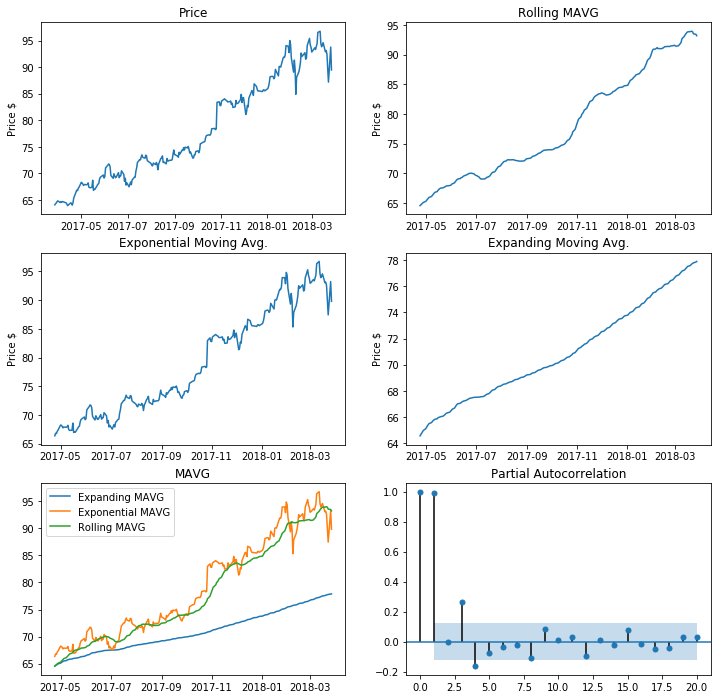

In [14]:
stock.summary_plot();

In [458]:
train_preds = h_w.predict(start =0 , end = len(train))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [459]:
len(train_preds)

243

In [449]:
h_w = ExponentialSmoothing(endog = train)
h_w = h_w.fit()

train_preds = h_w.predict( )
test_preds = h_w.forecast(steps=10)

# test_acc = np.sqrt(mean_squared_error(test, test_preds))
# print(f'Your testing RMSE is: {train_acc}')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [155]:
h_w.fcastvalues

array([4.67904211])

In [147]:
len(test_preds)

41

In [148]:
# print(mean_squared_error(train.diff(days).dropna(), train_preds))
print(mean_squared_error(test.diff(days).dropna(), test_preds))

145.3076180234769
